- **Tarea del backlog:** https://github.com/UCM-GIDIA-PD1/c2425-R4/issues/26.
- **Propósito del código:** Transformaciones y primer modelo regresión logística.  
- **Autor(es):** Francisco Pastor.  
- **Descripción y uso:** Ejecutar para ver resultado de modelo regresión logística en P2.
- **Estado actual:** Importante revisión ya que presenta un Accuracy del 49%.


In [ ]:
#NO se puede hacer validación cruzada normal, hay que usar tscv = TimeSeriesSplit(n_splits=5)

# REGRESIÓN LOGÍSTICA

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Leo los df divididos en orden cronológico de forma que los resultados sean lo más reales posibles
ruta_train =  os.path.join("..","..", "data", "processed","train.parquet")
df_train= pd.read_parquet(ruta_train)
df_train.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
0,2000-06-09,Kevin Randleman,Pedro Rizzo,False,0.0,0.8,0.279,0.315,0.770,0.000,...,0.0,0.0,0.8,0.0,-0.8,-0.036,0.615385,1.0,0.0,526.0
1,2000-09-22,Jeremy Horn,Eugene Jackson,False,0.0,0.5,0.696,0.550,0.084,0.000,...,0.0,0.5,0.0,0.0,-0.5,0.146,0.250000,0.4,0.0,3.3
2,2001-02-23,Tito Ortiz,Evan Tanner,False,0.3,0.0,0.552,0.741,0.874,1.000,...,0.0,0.0,0.0,0.0,0.3,-0.189,0.178571,-0.1,0.0,458.1
3,2001-05-04,Chuck Liddell,Kevin Randleman,False,0.0,0.0,0.508,0.532,0.000,0.758,...,1.0,0.0,0.0,1.0,0.0,-0.024,-0.518519,-1.5,0.2,-455.0
4,2001-06-29,Pat Miletich,Shonie Carter,False,0.0,1.0,0.451,0.521,0.500,0.646,...,0.5,0.0,0.0,0.0,-1.0,-0.070,0.037945,0.8,-1.2,-137.3


In [6]:
ruta_val = os.path.join("..","..", "data", "processed","validation.parquet")
df_val = pd.read_parquet(ruta_val)
df_val.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
0,2021-06-26,Yancy Medeiros,Damir Hadzovic,True,0.0,0.0,0.261,0.323,0.000,0.432,...,1.0,0.5,1.5,1.8,0.0,-0.062,-0.368421,0.0,0.3,-59.5
1,2021-07-10,Tai Tuivasa,Greg Hardy,False,0.8,0.3,0.661,0.544,0.000,0.300,...,1.0,0.0,1.0,1.0,0.5,0.117,-0.230769,0.0,0.0,-20.0
2,2021-07-10,Irene Aldana,Yana Santos,False,0.3,0.0,0.367,0.731,0.000,0.150,...,0.0,0.0,3.5,0.0,0.3,-0.364,-0.187500,0.0,-0.2,-437.6
3,2021-07-10,Dustin Poirier,Conor McGregor,False,0.5,0.3,0.518,0.558,0.542,0.000,...,2.0,2.0,1.0,0.0,0.2,-0.040,0.222222,1.4,0.0,64.3
4,2021-07-10,Gilbert Burns,Stephen Thompson,False,0.2,0.3,0.547,0.467,0.075,0.000,...,0.0,0.0,2.0,3.0,-0.1,0.080,0.122449,0.3,0.0,140.9


In [7]:
ruta_test =  os.path.join("..","..", "data", "processed","test.parquet")
df_test= pd.read_parquet(ruta_test)
df_test.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF
0,2023-04-22,Rani Yahya,Montel Jackson,True,0.0,2.1,0.569,0.513,0.415,0.240,...,0.0,0.0,5.0,2.0,-2.1,0.056,0.047222,0.5,0.7,140.0
1,2023-04-22,Jeremiah Wells,Matthew Semelsberger,False,0.7,1.8,0.529,0.382,0.060,0.800,...,0.0,0.0,0.0,1.8,-1.1,0.147,-0.403226,0.3,0.0,-111.5
2,2023-04-29,Caio Borralho,Michal Oleksiejczuk,False,0.0,0.6,0.565,0.510,0.690,0.100,...,0.0,2.0,0.0,1.0,-0.6,0.055,0.370656,1.0,1.2,414.4
3,2023-04-29,Song Yadong,Ricky Simon,False,0.5,0.8,0.379,0.595,0.500,0.407,...,0.0,0.0,1.0,1.0,-0.3,-0.216,0.150000,-0.7,0.0,-244.9
4,2023-04-29,Rodolfo Vieira,Cody Brundage,False,0.0,0.3,0.528,0.214,0.305,0.700,...,1.0,0.0,0.5,1.0,-0.3,0.314,-0.393102,0.1,0.0,62.6


In [8]:
X_train = df_train.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER"])
y_train = df_train["WINNER"]
y_train.value_counts(normalize=True)

WINNER
False    0.618167
True     0.381833
Name: proportion, dtype: float64

In [9]:
X_val = df_val.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER"])
y_val = df_val["WINNER"]
y_val.value_counts(normalize=True)

WINNER
False    0.53167
True     0.46833
Name: proportion, dtype: float64

In [10]:
X_test = df_test.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER"])
y_test = df_test["WINNER"]
y_test.value_counts(normalize=True)

WINNER
False    0.551724
True     0.448276
Name: proportion, dtype: float64

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

def train_logistic_regression_grid(X_train, y_train, X_val, y_val):
    # Calcular pesos de clase para manejar desbalance de datos
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Definir modelo base
    log_reg = LogisticRegression(random_state=42, max_iter=500)

    # Cuadrícula de hiperparámetros
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularización
        'penalty': ['l1', 'l2'],  # Tipo de regularización
        'solver': ['liblinear'],  # 'liblinear' permite L1 y L2
        'class_weight': [None, class_weight_dict]  # Sin ajuste y con ajuste de pesos
    }

    # Definir la métrica de optimización como el F1-score macro
    f1_scorer = make_scorer(f1_score, average='macro')

    # Búsqueda con validación cruzada
    grid_search = GridSearchCV(
        estimator=log_reg,
        param_grid=param_grid,
        scoring=f1_scorer,
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    # Entrenar el modelo
    grid_search.fit(X_train, y_train)

    # Imprimir mejores parámetros
    print("Mejores parámetros:", grid_search.best_params_)

    # Evaluar el mejor modelo en el conjunto de validación
    y_pred = grid_search.best_estimator_.predict(X_val)
    print("Reporte de clasificación:")
    print(classification_report(y_val, y_pred))

    return grid_search.best_estimator_

In [12]:
print("-- Entrenamiento usando ajuste de hiperparámetros con GridSearchCV --")
modelo_log_reg  = train_logistic_regression_grid(X_train,y_train,X_val,y_val)

-- Entrenamiento usando ajuste de hiperparámetros con GridSearchCV --
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight={0: np.float64(0.808843085106383), 1: np.float64(1.3094725511302476)}, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, pe

In [14]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, log_loss

print("\n-- Métricas del modelo con hiperparámetros ajustados --")

# Predicciones
y_val_pred = modelo_log_reg.predict(X_val)  # Predicción de clases
y_val_prob = modelo_log_reg.predict_proba(X_val)[:, 1]  # Probabilidad de la clase positiva

# Cálculo de métricas
accuracy = accuracy_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_prob)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
log_loss_val = log_loss(y_val, y_val_prob)

    # Imprimir métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1_val:.4f}")
print(f"AUC-ROC: {roc_auc_val:.4f}")
print(f"Precisión: {precision_val:.4f}")
print(f"Sensibilidad (Recall): {recall_val:.4f}")
print(f"Log-loss: {log_loss_val:.4f}")
    


-- Métricas del modelo con hiperparámetros ajustados --
Accuracy: 0.4971
F1-Score: 0.5774
AUC-ROC: 0.5534
Precisión: 0.4761
Sensibilidad (Recall): 0.7336
Log-loss: 0.7524


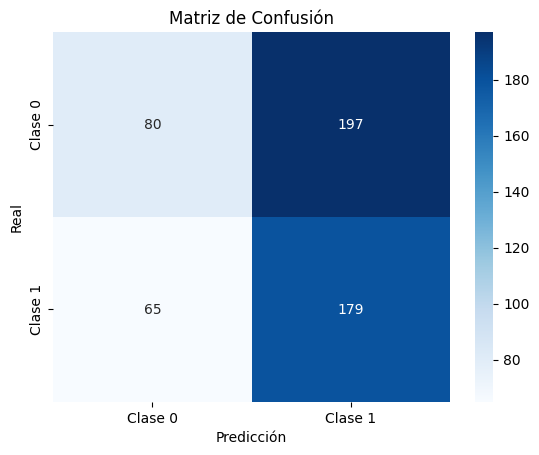

In [15]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()